**Project Title : Mall Customer Segmentation**

**Objective:**

The aim of this project is to segment customers into distinct groups based on their spending habits and income levels using clustering techniques. This helps to identify target customers for personalized marketing strategies.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Kaggle projects/Mall Customer Segmentation')

In [ ]:
dfc=pd.read_csv('Mall_Customers.csv')
dfc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Data Exploration**

In [ ]:
print(dfc.shape)
dfc.info()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
dfc.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dfc.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


### **Data Preprocessing**

encode gender variable

### **Exploratory Data Analysis**

Gender
Female    112
Male       88
Name: count, dtype: int64


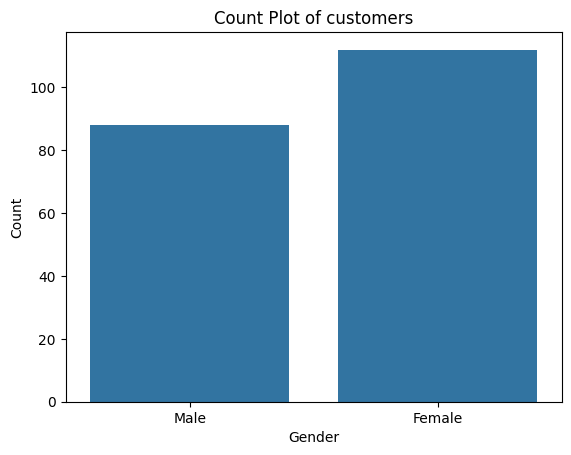

In [ ]:
#univariant
print(dfc['Gender'].value_counts())

sns.countplot(x='Gender', data=dfc)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of customers')
plt.show()

In [ ]:
# filtering numerical features
df_numerical=dfc[['Annual Income (k$)','Age','Spending Score (1-100)']]
print(df_numerical.shape)
df_numerical.head()

(200, 3)


,Annual Income (k$),Age,Spending Score (1-100)
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40


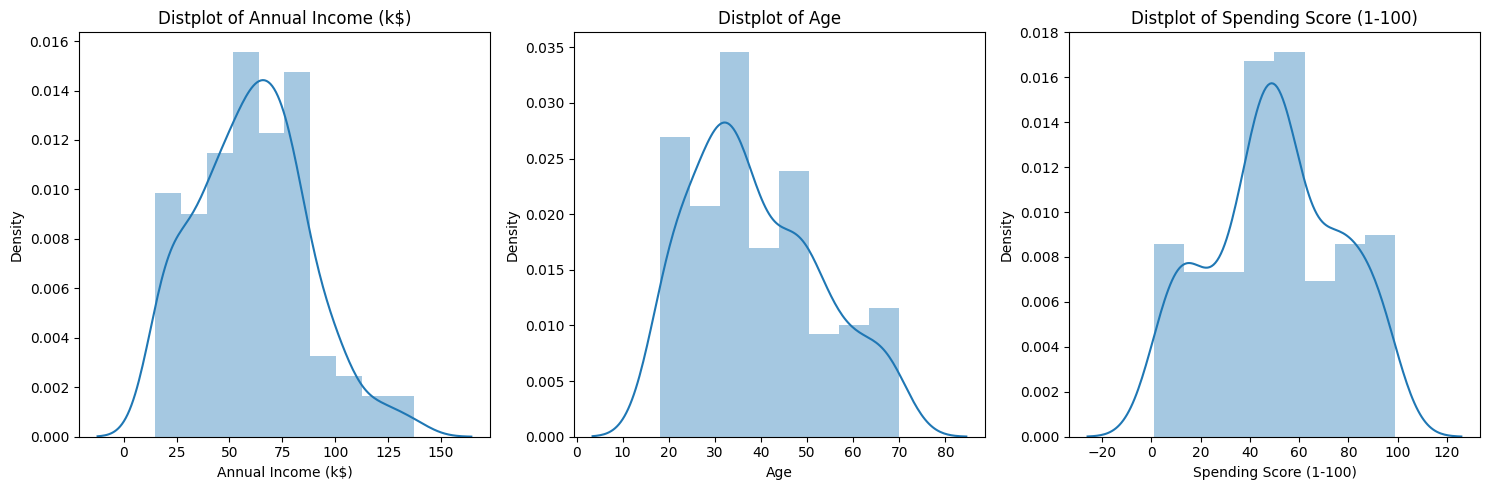

In [ ]:
# Distributions of numerical features
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes = axes.flatten()
for i, col in enumerate(df_numerical.columns):
    sns.distplot(df_numerical[col], ax=axes[i])
    axes[i].set_title(f'Distplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations:**

The annual income plot shows a near normal distribution with most customers are earning income between 40k and 80k, while very few customers are earning below 30K or above 80K. The Age plot shows slightly right skewed with most of the customers are in between 20 and 40 aged, peaked at the age of 30 years, and less customers below 20 years or above 60 years. Spending Score (1-100) is uniformly distributed, indicating a balanced spread across low, medium, and high spenders, without a dominant spending behavior group. These insights suggest that most customers are middle-income earners and younger people, making them the key demographic for targeted marketing, with spending behavior varying widely and suitable for segmentation.

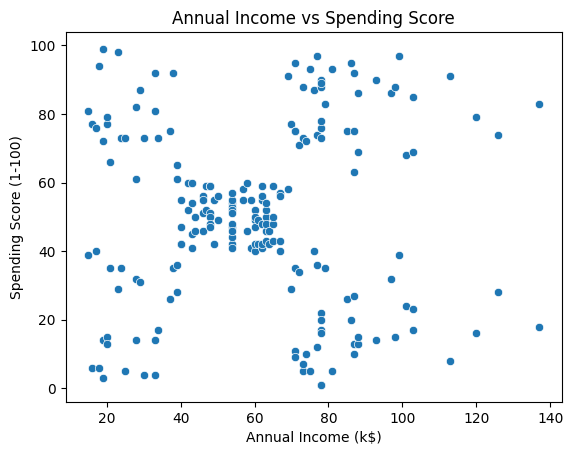

In [ ]:
#Bivariant Analysis
#Annual income vs Spending score

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=dfc
)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


customers with Low-income (15k–40k) are widely distributed throughout all spending scores, from low to high.
Moderate-income customers (40k–80k) are clustered around high spending scores (60–100) while some low spenders are also included.
High-income customers (80k–140k) are mostly in moderate spending scores (40–60), with only a few people in the high range.

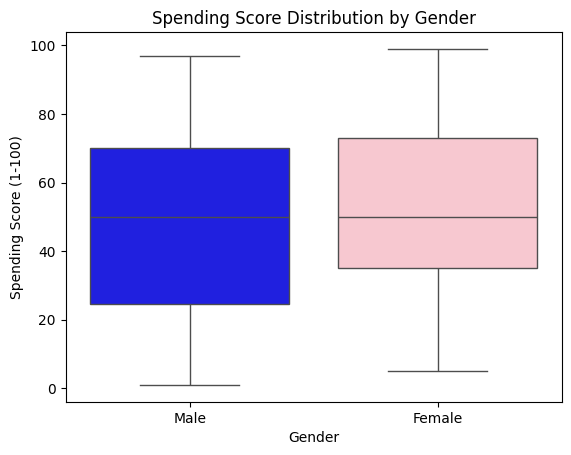

In [ ]:
# Gender vs Spending Score
sns.boxplot(
    x='Gender',
    y='Spending Score (1-100)',
    data=dfc,
    palette={'Male': 'blue', 'Female': 'pink'}
)
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()


Both genders have similar spending score distributions, with slightly higher median scores for females. The spending scores of both genders may differ significantly.

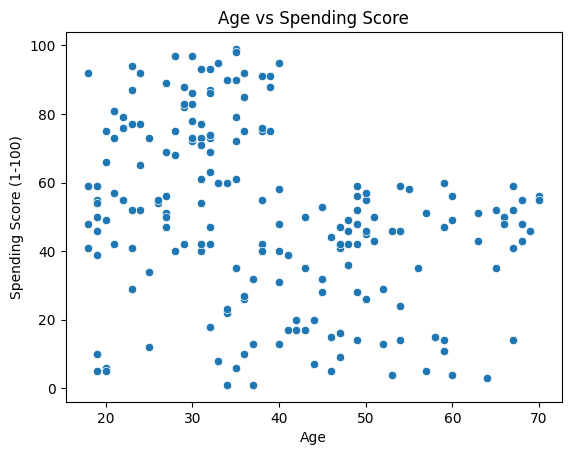

In [ ]:
#Age vs Spending score
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=dfc
)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


Younger customers(20-30) having higher spending scores, while spending scores decreases as age increases with older customers (Aged 50+) showing lower scores.

                        Annual Income (k$)       Age  Spending Score (1-100)
Annual Income (k$)                1.000000 -0.012398                0.009903
Age                              -0.012398  1.000000               -0.327227
Spending Score (1-100)            0.009903 -0.327227                1.000000


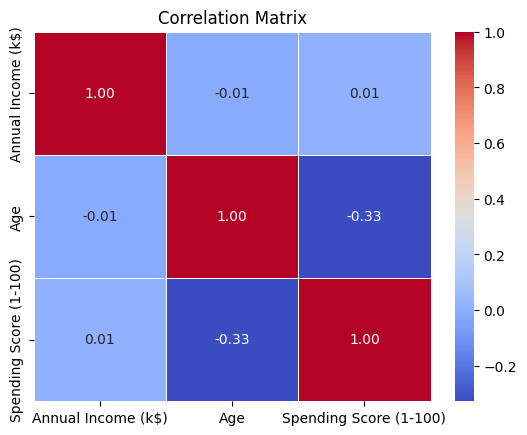

In [ ]:
correlation = df_numerical.corr()
print(correlation)
sns.heatmap(correlation , annot = True , cmap = "coolwarm"  ,fmt = ".2f" , linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

Annual Income (k$) and Spending Score (1-100) have a very weak positive correlation (0.01), indicating that income has less impact on spending scores. There is nearly no correlation between age and annual income (-0.01). The relationship between spending score and age is moderately negative (-0.33), meaning younger customers usually spend more.

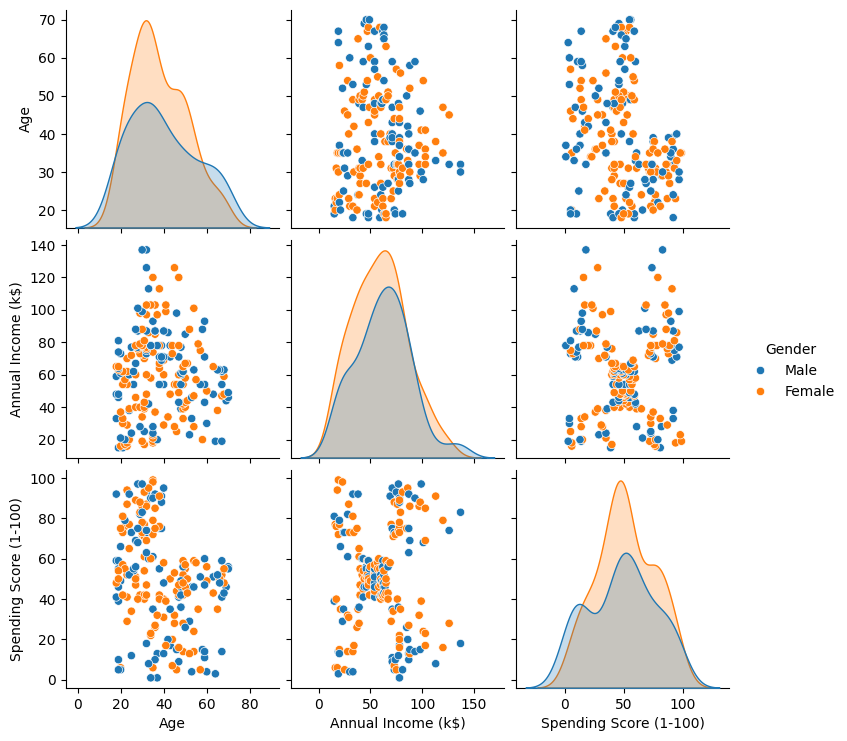

In [ ]:
sns.pairplot(dfc[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')
plt.show()


**Insights:**
Customers can be segmented based on income and spending score into potential clusters for targeted marketing.
Younger customers tend to have higher spending scores, making them a key demographic for marketing strategies.
Both genders exhibit similar spending and income patterns, so gender-specific marketing may not be necessary.

In [ ]:
#Encoding Gender variable
#dfc['Gender'] = dfc['Gender'].map({'Male': 1, 'Female': 0})

#or

label_encoder = LabelEncoder()
dfc['Gender'] = label_encoder.fit_transform(dfc['Gender'])  # Male = 1, Female = 0
dfc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


### **Modelling**

In [ ]:
X=dfc[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)

### **1. K-Means Clustering**

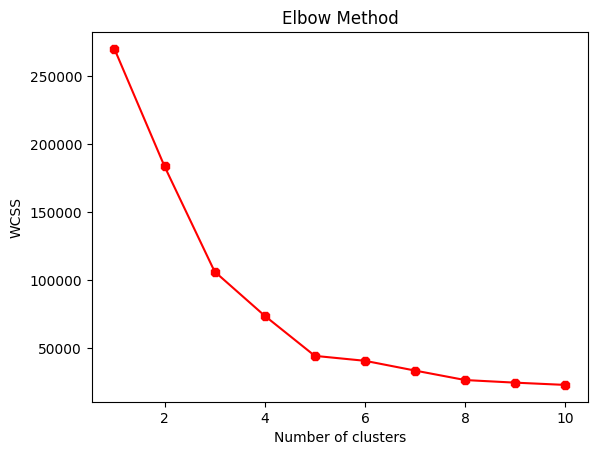

In [ ]:
# Determine the optimal number of clusters using the Elbow Method.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, color='red' , marker='8')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


**5 is the best value for K**

In [ ]:
# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_cluster_labels = kmeans.fit_predict(X)
dfc['Cluster'] = y_cluster_labels
dfc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [ ]:
# Evaluate the clustering model
silhouette_avg = silhouette_score(X, y_cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.554


In [ ]:
# Analyze each cluster
cluster_analysis = dfc.groupby('Cluster').mean()[['Annual Income (k$)', 'Spending Score (1-100)']]
print("\nCluster Analysis (Mean Values):")
print(cluster_analysis)


Cluster Analysis (Mean Values):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


This clustering suggests a wide range of customer behaviors ranging from high-income, high-spending individuals to lower-income, less expensive ones.According to the Silhouette Score, while these groups show some separation, there may be overlap or possibilities for improvement.

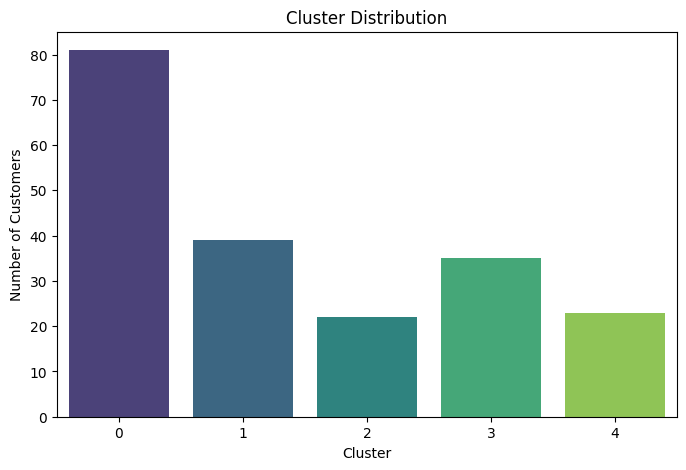

In [ ]:
#Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=dfc, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

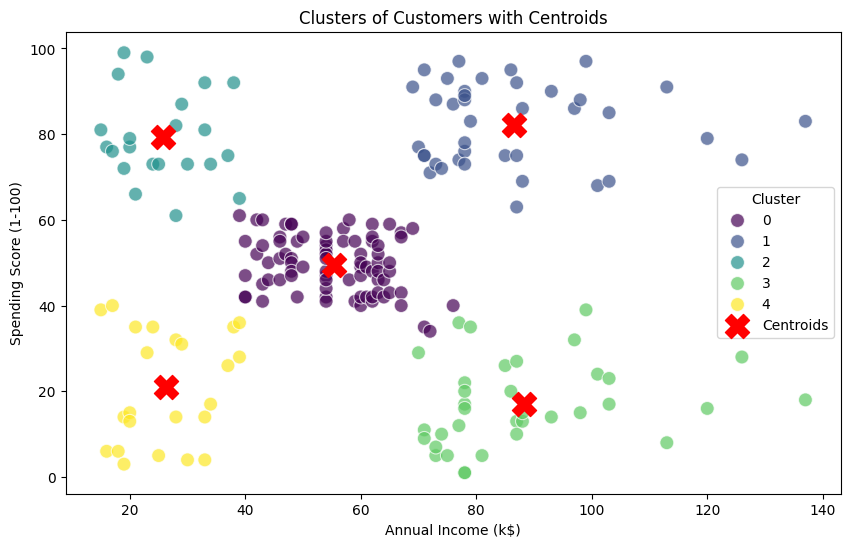

In [ ]:
#Visualize Clusters with Centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Annual Income (k$)'],
                y=X['Spending Score (1-100)'],
                hue=dfc['Cluster'],
                palette='viridis',
                s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters of Customers with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

**Observations**

High-income, high-spending customers **(top-right cluster)** – These customers have high income and high spending scores, perhaps indicating premium customers.
Low-income, low-spending customers **(bottom-left cluster)** – These customers have low income and low spending scores, possibly indicating budget-conscious customers.
High-income, low-spending customers **(bottom-right cluster)** – These customers have high income but do not spend much, possibly indicating conservative spenders.
Low-income, high-spending customers **(top-left cluster)** – These customers have low income but high spending, which might indicate impulsive or dependant on credit shoppers.
Middle-income, moderate-spending customers **(center cluster)** – These customers have average income and spending scores.

### **2. Hierarchical Clustering**